# Script to convert DiMESTV TIFF to videos 

In [1]:
import os
import read

# list of files ending in .tif in 'munaretto/2022-11-21_Bortolon'
files = os.listdir('munaretto/2022-11-21_Bortolon')
processed = os.listdir('/home/maana/mp_2022_34_53/dimes')
processed = [file.split('.')[0] for file in processed]
for file in files:
    if file.endswith('.tif'):
        
        shot = file.split('_')[0]
        if shot in processed:
            print(f'now reading {file} - skip video already processed')
        else:
            print(f'now reading {file}')
            read.dimes_movie(f'munaretto/2022-11-21_Bortolon/{file}')


now reading 192963_CII_1x1_1ms_low.tif
now reading 192964_CII_1x1_1ms_low.tif
now reading 192960_DaplhaND_1x1_5ms_low.tif
now reading 192970_CII_1x1_1ms_low.tif
now reading 192969_CII_1x1_1ms_low.tif
now reading 192974_CII_1x1_1ms_low.tif
now reading 192973_CII_1x1_1ms_low.tif
now reading fiducial.tif
now reading 192967_CII_1x1_1ms_low.tif
now reading 192965_CII_1x1_1ms_low.tif
now reading 192962_CII_1x1_1ms_low.tif
now reading 192961_CII_1x1_4ms_low.tif
now reading 192966_CII_1x1_1ms_low.tif
now reading 192972_CII_1x1_1ms_low.tif
now reading 192968_CII_1x1_1ms_low.tif


# Average all frames of the fiducial and display, affine transform onto the floor map from A. McLean

In [4]:
import floor

M, boundary = floor.dimes_affine_transform(make_image=False)

# Overlay floor and and all diagnostic positions

** DiMES HEAD Posittion in the image - [0.7425000000000002, -1.2860477246198914] [x m,y m]

** DiMES TV FOV defined by these four points in the image - ([1.2513126515529454, -1.452450897466661], [0.6168952474546125, -1.846820304666919], [0.2902879884328313, -1.3024508591372181], [0.9247053925311641, -0.9080814519369601]) [x m,y m]

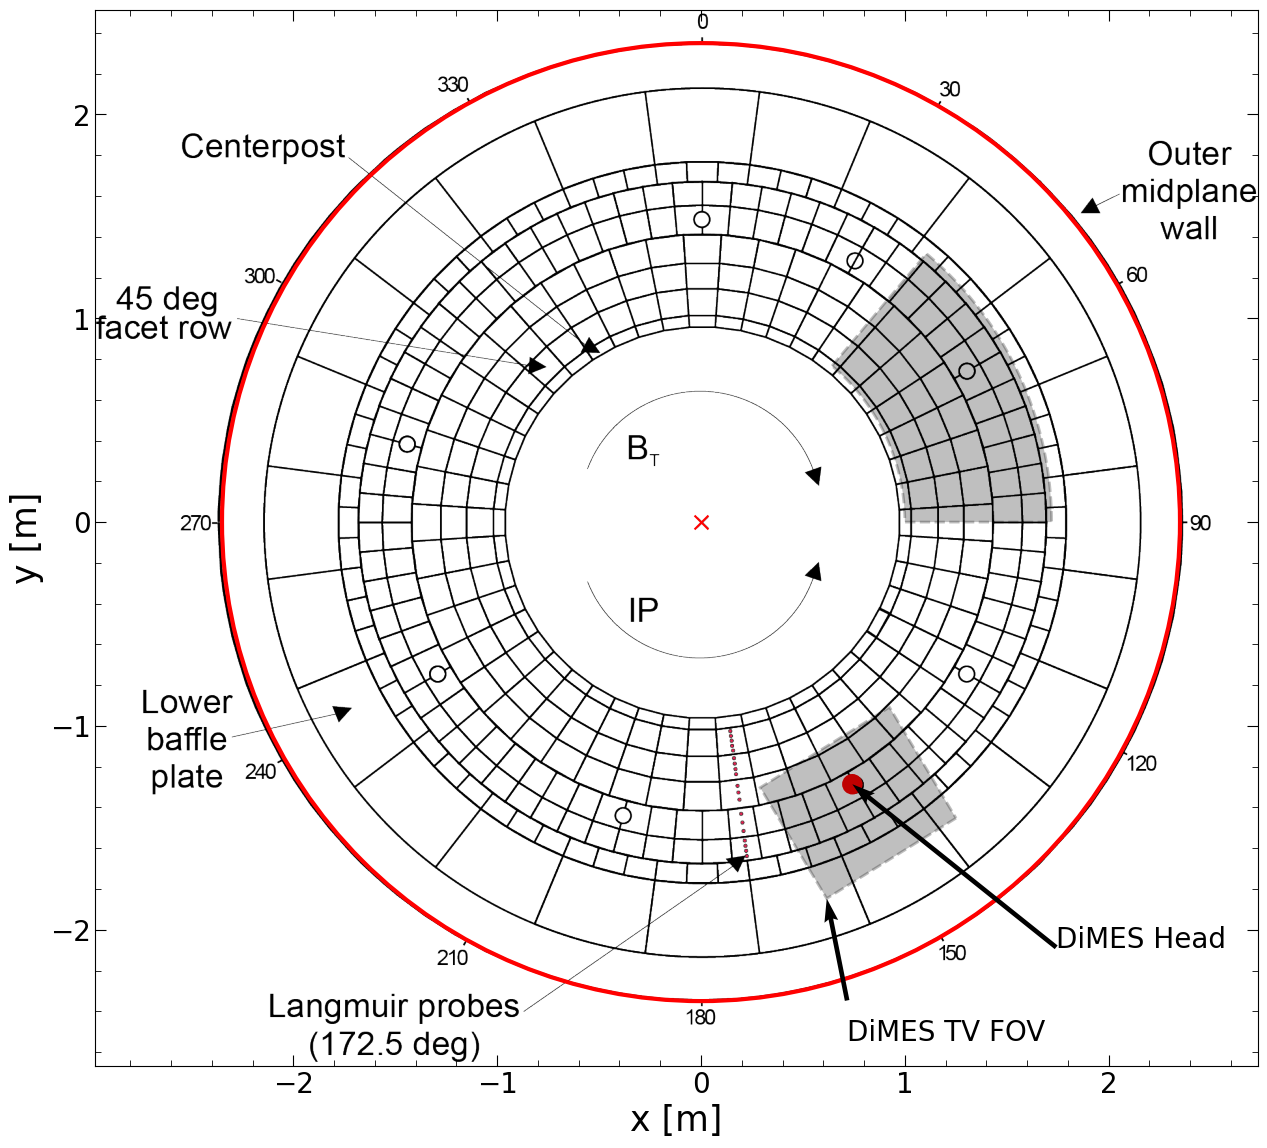

In [2]:
import floor 
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
import plot_tools as plot


fig, ax = plt.subplots(1,figsize=(15,15))
fig, ax = floor.show(fig,ax)
#ax = floor.show_dimes(ax)
#ax = plot.standard_ax(ax, 'x [m]', 'y [m]')
#ax = plot.add_minor_ticks(ax)
poly = plt.Polygon(boundary, fill=True, edgecolor='black', linewidth=2, alpha=0.25, linestyle='--',facecolor='black')
ax.add_patch(poly)
ax = floor.show_dimestv(ax,boundary)
# fast cam FOV R - 1, 1.720, phi = 40 - 90 deg
R = np.linspace(1,1.720,100)
phi = np.linspace(40,90,100)
bdry = [[r, phi[0]] for r in R] + [[R[-1],p] for p in phi] + [[r, phi[-1]] for r in R[::-1]] + [[R[0],p] for p in phi[::-1]]
bdry_xy = []
for pt in bdry:
    bdry_xy.append(process.pol_to_cart(pt))
fc_fov = plt.Polygon(bdry_xy, fill=True, edgecolor='black', linewidth=2, alpha=0.25, linestyle='--',facecolor='black')
ax.add_patch(fc_fov)


# Play one of the DiMES videos, and show the I,C coil plot next to it 

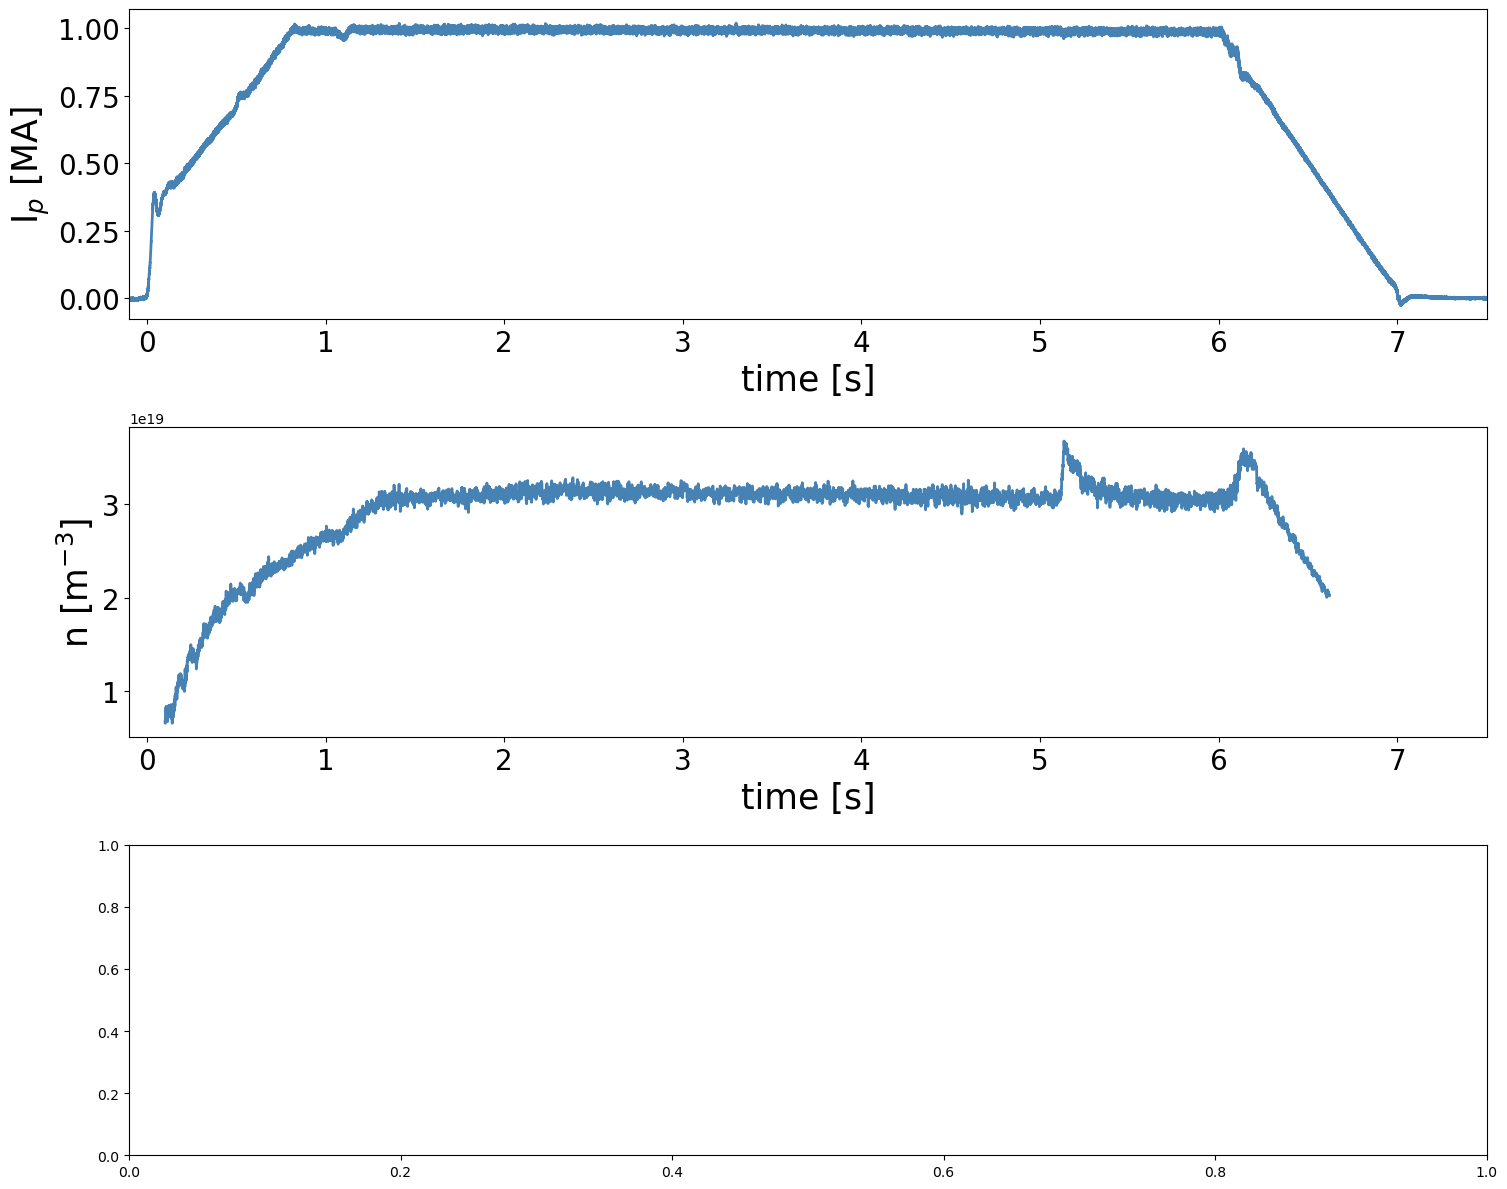

In [4]:
import matplotlib.pyplot as plt
import plot_tools as plot
import read

shot = 192969
fig, ax = plt.subplots(3,1,figsize=(15,12))
ip,t,units = read.one_d(shot,'ip')
plot.plot1d_ax(ax[0],t/1000,ip/1e6,'time [s]',r'I$_p$ [MA]',xlim=[-0.1,7.5])
n,t,units = read.one_d(shot,'density')
plot.plot1d_ax(ax[1],t/1000,n*1e6,'time [s]',r'n [m$^{-3}$]',xlim=[-0.1,7.5])
# tight 
fig.tight_layout()

In [24]:
units

['ms', '/cm^3']